# Autor: Francisco Adrian Guasumba Tupiza


## Carga de datos

In [1]:

import pandas as pd #importamos para dataframes
import numpy as np # numpy para calculos matematicos

Dataset=pd.read_excel(r"D:\UCM\Estadistica\Datosejercicoevaluacionalturaspython.xlsx") #obtener el dataset
Dataset.drop('Unnamed: 1',axis=1, inplace=True) #quitar una columna que se crea que no forma parte del dataset

In [2]:
# Usamos una mascara para dividir el dataset en dos uno que contenga los datos:
# Uno que tenga los datos predinastico temprano
# Uno que tenga los datos de predinastico tardio

mascara=Dataset['Época histórica']==1  #mascara para dividir
df_temprano = Dataset[mascara]         #predinastico temprano
df_tardio = Dataset[~mascara]          # predinastico tardio

## Medidas de centralizacion

### MEDIA ARITMETICA

In [3]:
# Usamos  funcion mean() incluida en python para obtener la media aritmetica de los cráneos.

media1=np.mean(df_temprano['Altura del cráneo'])  # media para dataset predinastico temprano
media2=np.mean(df_tardio['Altura del cráneo'])    # media para dataset predinastico tardio
 
print('Media Epoca Predinastico Temprano',media1) # imprimir resultados
print('Media Epoca Predinastico Tardio',media2)   

Media Epoca Predinastico Temprano 134.4
Media Epoca Predinastico Tardio 132.9


### MEDIA GEOMETRICA

In [4]:
from statistics import geometric_mean # libreria para calcular la media geometrica

media_geo1=geometric_mean(df_temprano['Altura del cráneo']) # Media geometrica para dataset predinastico temprano
media_geo2=geometric_mean(df_tardio['Altura del cráneo'])   # Media geometrica para dataset predinastico tardio

print('Media geometrica Predinastico Temprano ',round(media_geo1,3)) #impresion de resultados
print('Media geometrica Predinastico Tardio ',round(media_geo2,3))

Media geometrica Predinastico Temprano  134.396
Media geometrica Predinastico Tardio  132.896


### MEDIANA

In [5]:

median1= df_temprano['Altura del cráneo'].median() # Mediana  para dataset predinastico temprano
median2= df_tardio['Altura del cráneo'].median()   # Mediana  para dataset predinastico temprano

print('Mediana Predinastico Temprano  ',median1) #Impresion resultados 
print('Mediana Predinastico Tardio  ',median2)


Mediana Predinastico Temprano   134.0
Mediana Predinastico Tardio   133.0


### MODA 

In [6]:

moda1= df_temprano['Altura del cráneo'].mode() # usamos la funcion mode para obtener los valores que mas se repiten 
moda2= df_tardio['Altura del cráneo'].mode() 

print('moda Predinastico Temprano ',moda1[0]) # impresion de resultados
print('moda  Predinastico Tardio  ',moda2[0])



moda Predinastico Temprano  134
moda  Predinastico Tardio   133


## MEDIDAS DE DISPERSION 

### RANGO

In [7]:

# para cada resultado realizamos una resta entre el valor maximo y el valor minimo , los ordenamos de menor a mayor
# con sort(), los realizamos float por si los datos son flotantes y obtenemos el primer y ultimo valor, y los restamos.
# para obtener el rango 

rango1= float(df_temprano['Altura del cráneo'].sort_values().tail(1)) - float(df_temprano['Altura del cráneo'].sort_values().head(1))
rango2= float(df_tardio['Altura del cráneo'].sort_values().tail(1)) - float(df_tardio['Altura del cráneo'].sort_values().head(1))

print('Rango Predinastico Temprano',rango1) # imprimimos los resultados
print('Rango Predinastico Tardio',rango2) 




Rango Predinastico Temprano 5.0
Rango Predinastico Tardio 4.0


### VARIANZA

In [8]:

varianza1= np.var(df_temprano['Altura del cráneo']) #a travez de numpy var obtenemos la varianza de nuestra muestra de datos
varianza2= np.var(df_tardio['Altura del cráneo'])
print('varianza Predinastico Temprano ', round(varianza1,3)) #imprimimos los resultados
print('varianza Predinastico Tardio',round(varianza2,3)) 

varianza Predinastico Temprano  1.107
varianza Predinastico Tardio 1.023


### DESVIACION TIPICA

In [9]:
from statistics import stdev # importamos libreria para tener la desviacion standar

desviacion1 = stdev(df_temprano['Altura del cráneo']) #calculamos la desviacion de cada submuestra aplicando la funcion
desviacion2 = stdev(df_tardio['Altura del cráneo'])

print('desviacion Predinastico Temprano',round(desviacion1,3))
print('desviacion Predinastico Tardio',round(desviacion2,3))

desviacion Predinastico Temprano 1.07
desviacion Predinastico Tardio 1.029


### COEFICIENTE DE VARIACION DE PEARSON

In [10]:

Pearson1 = (desviacion1 / media1)*100 #Se realiza la operacion de division entre desviacion y media
Pearson2 = (desviacion2 / media2)*100 # Semultiplica *100 obtener un valor porcentual es decir 0.796 = 79%
print('coeficiente variacion de Pearson temprana', round(Pearson1,3)) #impresion de resltados
print('coeficiente variacion de Pearson de tardia ',round(Pearson2,3))

coeficiente variacion de Pearson temprana 0.796
coeficiente variacion de Pearson de tardia  0.774


## Resumen de medidas de centralizacion

In [11]:
#Se crea un dataframe para mostrar el resumen de los datos obtenidos de las medidas decentralizacion.
data = [
    ['Predinastico Temprano ', media1, median1, moda1[0], rango1, varianza1, desviacion1,Pearson1],
    ['Predinastico Tardio ', media2, median2, moda2[0], rango2, varianza2, desviacion2,Pearson2]]

columns = ['Epoca', 'Media(mm)', 'Mediana(mm)', 'Moda(valor más repetido )', 'Rango(mm)', 'Varianza(mm^2)', 'Desviacion(mm)', 'CV_Pearson']

Resultados_dispersion = pd.DataFrame(data, columns=columns)
Resultados_dispersion.set_index('Epoca', inplace=True)
Resultados_dispersion 

,Media(mm),Mediana(mm),Moda(valor más repetido ),Rango(mm),Varianza(mm^2),Desviacion(mm),CV_Pearson
Epoca,,,,,,,
Predinastico Temprano,134.4,134.0,134,5.0,1.106667,1.069966,0.796106
Predinastico Tardio,132.9,133.0,133,4.0,1.023333,1.028893,0.774186


# Asimetria


### Asimetria de Fisher

Coeficiente de asimetria Predinastico Temprano -0.17
Coeficiente de asimetria Predinastico Tardio  -0.20


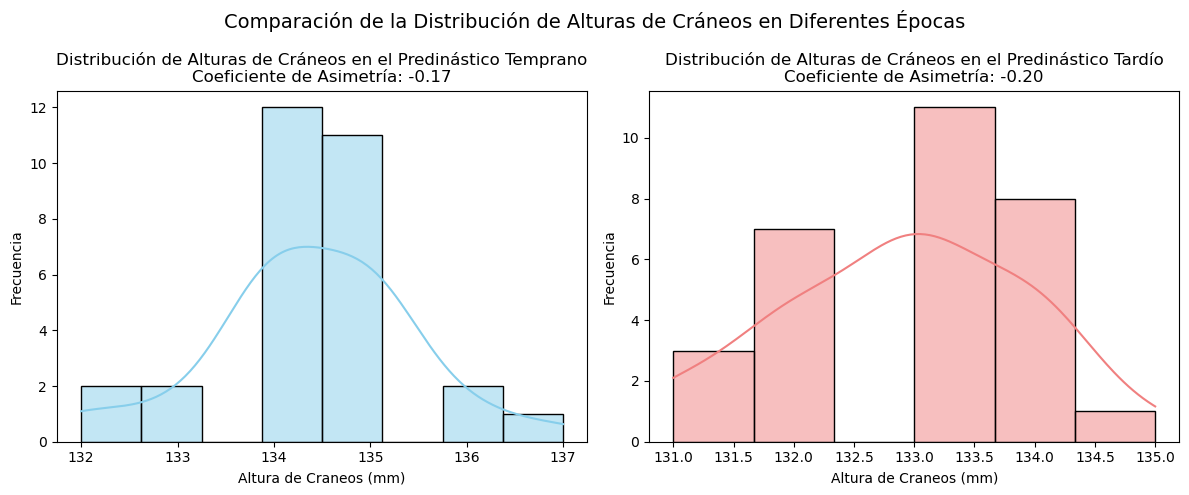

In [12]:
from scipy.stats import skew # es una manera mas directa de obtener el coeficiente de asimetria importando libreria skew
import seaborn as sns #libreria para graficar
import matplotlib.pyplot as plt #libreria para graficar

#Resultados de la asimetria usando la funcion skew
asimetria1 = (df_temprano).skew()[1]
asimetria2 = (df_tardio).skew()[1]

#Respuestas usando la asimetria con funcion de la libreria 
print('Coeficiente de asimetria Predinastico Temprano', "{:.2f}".format(asimetria1))
print('Coeficiente de asimetria Predinastico Tardio ', "{:.2f}".format(asimetria2))


#Grafico de la asimetria y distribucion de datos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico para "Predinástico Temprano"
sns.histplot(df_temprano['Altura del cráneo'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title(f'Distribución de Alturas de Cráneos en el Predinástico Temprano\nCoeficiente de Asimetría: {asimetria1:.2f}')
axes[0].set_xlabel('Altura de Craneos (mm)')
axes[0].set_ylabel('Frecuencia')

# Gráfico para "Predinástico Tardío"
sns.histplot(df_tardio['Altura del cráneo'], kde=True, ax=axes[1], color='lightcoral')
axes[1].set_title(f'Distribución de Alturas de Cráneos en el Predinástico Tardío\nCoeficiente de Asimetría: {asimetria2:.2f}')
axes[1].set_xlabel('Altura de Craneos (mm)')
axes[1].set_ylabel('Frecuencia')

plt.suptitle('Comparación de la Distribución de Alturas de Cráneos en Diferentes Épocas', fontsize=14)
plt.tight_layout()
plt.show()



# Curtosis

coef curtosis Temprano  1.0183245892347403
coef curtosis Tardia  -0.5040834924441051


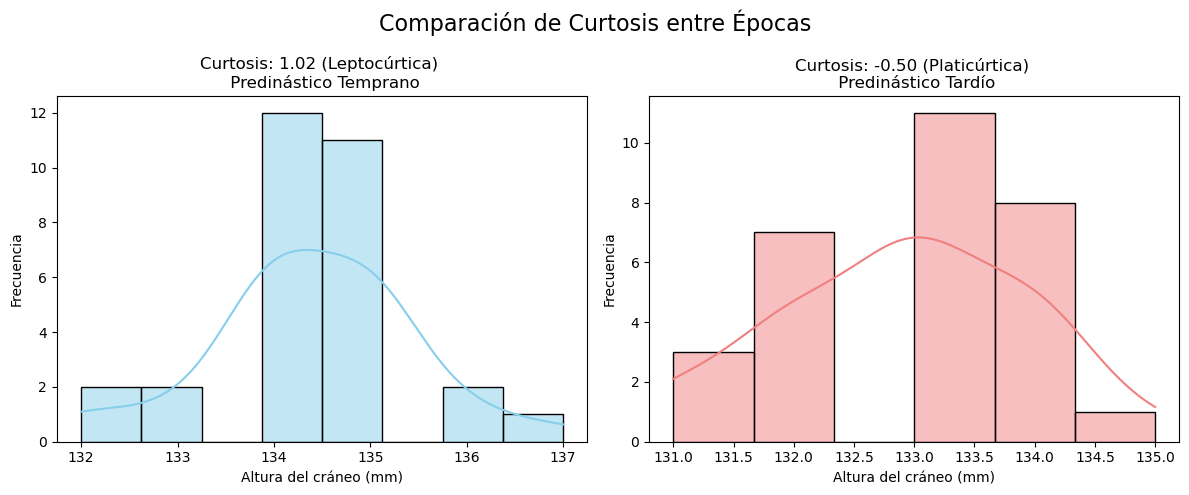

In [13]:
import scipy.stats as stats 
from scipy.stats import kurtosis #importamos la libreria 

#Calculamos la curtosis mediante la funcion

curtosis1 =df_temprano.kurtosis()[1]
curtosis2 =df_tardio.kurtosis()[1]

#Imprimimos los resultados

print('coef curtosis Temprano ', curtosis1)
print('coef curtosis Tardia ', curtosis2)

#Creamos el grafico de distribucion

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico para "Predinástico Temprano"

sns.histplot(df_temprano['Altura del cráneo'], kde=True, ax=axes[0],color='skyblue')
axes[0].set_title(f'Curtosis: {curtosis1:.2f} (Leptocúrtica) \n Predinástico Temprano')
axes[0].set_xlabel('Altura del cráneo (mm)')
axes[0].set_ylabel('Frecuencia')

# Gráfico para "Predinástico Tardío"

sns.histplot(df_tardio['Altura del cráneo'], kde=True, ax=axes[1],color='lightcoral')
axes[1].set_title(f'Curtosis: {curtosis2:.2f} (Platicúrtica) \n Predinástico Tardío')
axes[1].set_xlabel('Altura del cráneo (mm)')
axes[1].set_ylabel('Frecuencia')

plt.suptitle('Comparación de Curtosis entre Épocas', fontsize=16)
plt.tight_layout()
plt.show()



## DIAGRAMA DE BIGOTES

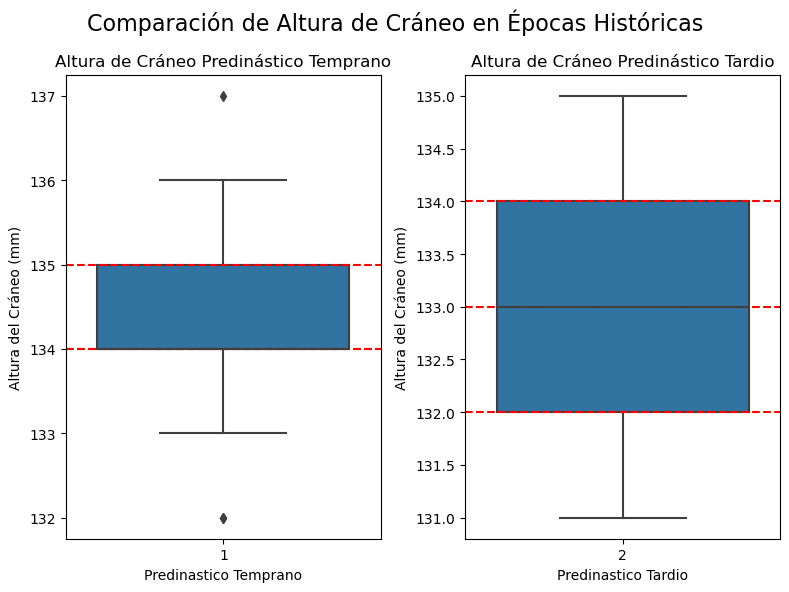

In [14]:
#graficamos el diagrama de bigotes 

fig, axes = plt.subplots(1, 2, figsize=(8, 6))

# simplemente colocamoslos datos predinastico temprano y tardio en la 
# funcion para poder obserbar la distribucion de los datos en el diagrama

# Calcular cuartiles
cuartiles_temprano = df_temprano['Altura del cráneo'].quantile([0.25, 0.5, 0.75])
cuartiles_tardio = df_tardio['Altura del cráneo'].quantile([0.25, 0.5, 0.75])

sns.boxplot(data=df_temprano, x='Época histórica', y='Altura del cráneo', ax=axes[0])
axes[0].set_title(f'Altura de Cráneo Predinástico Temprano')
axes[0].set_xlabel('Predinastico Temprano')
axes[0].set_ylabel('Altura del Cráneo (mm)')

sns.boxplot(data=df_tardio, x='Época histórica', y='Altura del cráneo', ax=axes[1])
axes[1].set_title(f'Altura de Cráneo Predinástico Tardio')
axes[1].set_xlabel('Predinastico Tardio')
axes[1].set_ylabel('Altura del Cráneo (mm)')

# Colocamos linea de cuartiles 
for cuartil in cuartiles_temprano:
    axes[0].axhline(cuartil, linestyle='--', color='red')

# Dibujar líneas de cuartiles en el eje y para el gráfico de la Época Tardía
for cuartil in cuartiles_tardio:
    axes[1].axhline(cuartil, linestyle='--', color='red')
    
plt.suptitle('Comparación de Altura de Cráneo en Épocas Históricas', fontsize=16)
plt.tight_layout()
plt.show()

# Prueba Kolmogorov-Smirnov

In [15]:

from scipy.stats import kstest,norm #Importamos la libreria parala prueba ktest

#por medio de la media y la desvicacion se crea la funcion normal con la que se comparar nuestros datos
expected_distribution_temprano = norm(loc=media1, scale=desviacion1)
#Realizamos la prueba K e imprimimos 
ks_statistic_temprano, p_value_temprano = kstest(df_temprano['Altura del cráneo'], expected_distribution_temprano.cdf)
print('Predinastico Temprano ')
print("Estadística KS ", ks_statistic_temprano)
print("Valor P", p_value_temprano,'\n')
#Prueba para datos tardios.

expected_distribution_tar = norm(loc=media2, scale=desviacion2)
ks_statistic_tar, p_value_tar = kstest(df_tardio['Altura del cráneo'], expected_distribution_tar.cdf)
print('Predinastico Tardio')
print("Estadística KS ", ks_statistic_tar)
print("Valor p Predinastico ", p_value_tar)





Predinastico Temprano 
Estadística KS  0.22092700693518066
Valor P 0.0911953408223295 

Predinastico Tardio
Estadística KS  0.20537964324634056
Valor p Predinastico  0.13789840451236535


## Resumen de resultados

In [16]:
import pandas as pd
## incluimos todas las variables calculadas.
data = [
    ['Predinastico Temprano', media1, median1, moda1[0], rango1, varianza1, desviacion1, Pearson1, asimetria1, curtosis1, ks_statistic_temprano, p_value_temprano],
    ['Predinastico Tardío', media2, median2, moda2[0], rango2, varianza2, desviacion2, Pearson2, asimetria2, curtosis2, ks_statistic_tar, p_value_tar]
]

columns = ['Época', 'Media (mm)', 'Mediana(mm)', 'Moda', 'Rango(mm)', 'Varianza(mm^2) ', 'Desviación(mm)', 'CV_Pearson', 'Asimetría', 'Curtosis', 'KS', 'Valor P']

Resultados = pd.DataFrame(data, columns=columns)
Resultados.set_index('Época', inplace=True)
Resultados


,Media (mm),Mediana(mm),Moda,Rango(mm),Varianza(mm^2),Desviación(mm),CV_Pearson,Asimetría,Curtosis,KS,Valor P
Época,,,,,,,,,,,
Predinastico Temprano,134.4,134.0,134,5.0,1.106667,1.069966,0.796106,-0.173731,1.018325,0.220927,0.091195
Predinastico Tardío,132.9,133.0,133,4.0,1.023333,1.028893,0.774186,-0.195379,-0.504083,0.205380,0.137898


## Intervalos de confianza (0.90 - 0.95 -0. 99)

In [17]:
from math import sqrt #funcion cuadratica
from scipy.stats import t

#diferencia de las medias 
dif_media= media1-media2
print('diferencia de media',dif_media)
 
#Se obtienen los grados de libertada para los dos conjuntos de datos juntos
grados_l=len(df_temprano['Altura del cráneo'].values)+len(df_tardio['Altura del cráneo'].values)-2


#obtenemos la longitud de los dos conjuntos de datos

n1 = len(df_temprano['Altura del cráneo'].values)
n2 = len(df_tardio['Altura del cráneo'].values) 

#obtenemos la varianza compuesta de los dos conjuntos de datos 
varianza_compuesta = ((n1 - 1) * varianza2 + (n2 - 1) * varianza1) / (n1 + n2 - 2)
#obtenemos el Error estandar de los dos conjuntos de datos 
error_SE = sqrt((varianza_compuesta/n1)+(varianza_compuesta/n2))

#obtenemos los valores criticos del estadistico t para cada nivel de confianza 90% 95% y 99%
valor_critico90= t.ppf(1 - 0.1 / 2, grados_l)
valor_critico95=t.ppf(1 - 0.05 / 2, grados_l)
valor_critico99=t.ppf(1 - 0.01 / 2, grados_l)

#Se calculan los margenes de error para nivel de confianza 0% 95% y 99%
margen_error90=valor_critico90*error_SE 
margen_error95=valor_critico95*error_SE
margen_error99=valor_critico99*error_SE

# se obtienen los intervalos de confianza para 00% 95% y 99%
Intervalo_confianza90=[dif_media-margen_error90,dif_media+margen_error90]

Intervalo_confianza95=[dif_media-margen_error95,dif_media+margen_error95]

Intervalo_confianza99=[dif_media-margen_error99,dif_media+margen_error99]
#imprimimosresultados
print('intervalo 90%',Intervalo_confianza90)
print('intervalo 95%',Intervalo_confianza95)
print('intervalo 99%',Intervalo_confianza99)

diferencia de media 1.5
intervalo 90% [1.0546009730554933, 1.9453990269445067]
intervalo 95% [0.9666258586999791, 2.033374141300021]
intervalo 99% [0.7903452140077526, 2.2096547859922473]


## Prueba T

### Prueba de levene

In [18]:
#Importamos la libreria para la prueba de levene 
from scipy.stats import levene
#evaluamos la prueba en nuestros dosconjuntos de datos temprano y tardio
statistic, p_value_l = levene(df_temprano['Altura del cráneo'], df_tardio['Altura del cráneo']) 
#dependiendo delresultadopdela prueba imprimimos si la varianza son aproximadasy se cumple la homogeneidad 
if p_value_l < 0.05:
    print("Varianzas no son iguales (heterogeneidad)")
    print('resultado', p_value_l)
else:
    print("Varianzas son iguales o aproximadas (homogeneidad)")
    print('resultado', p_value_l)

Varianzas son iguales o aproximadas (homogeneidad)
resultado 0.8629763102722959


###  Prueba T 

In [19]:
#Obtenemos la libreira para la prueba t
from scipy.stats import t
#evauamosla prueba t para los subconjuntos predinastico temprano y tardio e imprimos el resultado 
t_statistic_t, p_value_t = stats.ttest_ind(df_temprano['Altura del cráneo'], df_tardio['Altura del cráneo'])
print('Valor prueba_T',t_statistic_t)
print('P_value',p_value_t)

Valor prueba_T 5.53478118961368
P_value 7.857638259879935e-07


## Resumen de resultados intervalos - prueba t

In [20]:
data2 = [
    [dif_media, Intervalo_confianza90, Intervalo_confianza95 , Intervalo_confianza99, t_statistic_t, p_value_t]  
]

columns2 = ['Diferencia_media', 'Intervalo 90', 'Intervalo 95', 'Intervalo 99', 'Prueba_T ', 'Valor_P_prueba_T']

Resultados2 = pd.DataFrame(data2, columns=columns2)

Resultados2


,Diferencia_media,Intervalo 90,Intervalo 95,Intervalo 99,Prueba_T,Valor_P_prueba_T
0,1.5,"[1.0546009730554933, 1.9453990269445067]","[0.9666258586999791, 2.033374141300021]","[0.7903452140077526, 2.2096547859922473]",5.534781,7.857638e-07
